In [1]:
'''
Natural Language Processing: Two Examples of Real World Applications of NLP Models

1. Help with a Job Search
    - Dataset: LinkedIn Tech Job Postings
2. Product Sales Topic Analysis
    - Dataset: Amazon Reviews


Module Imports
1. Preprocessing & Base Packages
    - re
    - os
    - bs4
        - BeautifulSoup
    - numpy
    - gensim
    - string
    - pandas
    - pandarallel
    - collections
        - Counter
    - gensim.corpora
    - gensim.utils
        - simple_preprocess
    - pandarallel.utils
        - progress_bars
    - sklearn.decomposition
        - PCA
        - TruncatedSVD
    - sklearn.pipeline
        - FeatureUnion
        - Pipeline
    - sklearn.preprocessing
        - MinMaxScaler
        - StandardScaler
    - sklearn.feature_extraction.text:
        - CountVectorizer
        - TfidfVectorizer

2. Plotting & Visualizations
    - seaborn
    - squarify
    - pyLDAvis
    - pyLDAvis.gensim
    - matplotlib.pyplot

3. NLP Libraries
    - spacy
    - nltk.stem
        - PorterStemmer
    - spacy.tokenizer
        - Tokenizer
    
4. Machine Learning Models
    - gensim.models
        - CoherenceModel
    - sklearn.neighbors
        - NearestNeighbors
    - sklearn.model_selection
        - GridSearchCV
    - sklearn.neighbors
        - KNeighborsClassifier
    - sklearn.ensemble
        - RandomForestClassifier
'''

'\nNatural Language Processing: Two Examples of Real World Applications of NLP Models\n\n1. Help with a Job Search\n    - Dataset: LinkedIn Data Science Job Postings\n2. Product Sales Topic Analysis\n    - Dataset: Amazon Reviews\n\n\nModule Imports\n1. Preprocessing & Base Packages\n    - re\n    - os\n    - bs4\n        - BeautifulSoup\n    - numpy\n    - gensim\n    - string\n    - pandas\n    - pandarallel\n    - collections\n        - Counter\n    - gensim.corpora\n    - gensim.utils\n        - simple_preprocess\n    - pandarallel.utils\n        - progress_bars\n    - sklearn.decomposition\n        - PCA\n        - TruncatedSVD\n    - sklearn.pipeline\n        - FeatureUnion\n        - Pipeline\n    - sklearn.preprocessing\n        - MinMaxScaler\n        - StandardScaler\n    - sklearn.feature_extraction.text:\n        - CountVectorizer\n        - TfidfVectorizer\n\n2. Plotting & Visualizations\n    - seaborn\n    - squarify\n    - pyLDAvis\n    - pyLDAvis.gensim\n    - matplotli

In [2]:
# Preprocessing & Base Packages
import re
import os
import gensim
import string
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter
import gensim.corpora as corpora
from pandarallel import pandarallel
from gensim.utils import simple_preprocess
from pandarallel.utils import progress_bars
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Plotting & Visualizations
import squarify
import pyLDAvis
import seaborn as sns
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt   

# NLP Libraries
import spacy
from nltk.stem import PorterStemmer
from spacy.tokenizer import Tokenizer
    
# Machine Learning Models
from gensim.models import CoherenceModel
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Downloade Spacy package first
!python -m spacy download en_core_web_md

     |████████████████████████████████| 50.8 MB 2.3 MB/s eta 0:00:01
  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.1-py3-none-any.whl size=50916640 sha256=209da814e2ae25099ed00cc9dc55cc74cfccde7d91b802db4e29649168cf7caf
  Stored in directory: /private/var/folders/qs/cslr23xj55q4dkt936pnp1nc0000gn/T/pip-ephem-wheel-cache-fooudmzd/wheels/b8/ae/ae/c63bae74a3b3e18b2fa35e179387e6cdeb03a1c479ed45c351
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [3]:
# Loads spacy tools
nlp = spacy.load('en_core_web_md')

In [169]:
class Nlp(object):
    '''
    Class NLP

    Contains functions for data pre-processing, feature extraction, creating models, assessing model results,
    and data visualizations
    '''
    def __init__(self):
        pass
    
    def tokenize(text):
        '''
        Parses a string into a list of semantic units (words)
        
        Parameters
        -----------
            text: str: The string that the function will tokenize.
        
        Returns
        -----------
            tokens: list: tokens parsed out by the mechanics of your choice
        '''
        # Remove punctuation
        text = re.sub('[^a-zA-Z 0-9]', '', text)

        # Case Normalization (make everything lowercase)
        text = text.lower()

        # split into individiual tokens
        tokens = text.split(' ')

        # remove empty strings from list
        tokens = [i for i in tokens if i]

        return tokens
    
    def count(tokens):
        '''
        Count function takes corpus of document and creates a dataframe of word counts w/ some
        basic statistics about tokens in our corpus (i.e. corpus means collections text data)
        
        Parameters
        ------------
        tokens: list[str]: list of our tokens
        
        Returns
        -----------
        wc: pd.DataFrame: dataframe of token count
        '''
        # stores the count of each token
        word_counts = Counter()

        # stores the number of docs that each token appears in 
        appears_in = Counter()

        total_docs = len(tokens)

        for token in tokens:
            # stores count of every appearance of a token 
            word_counts.update(token)
            # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
            appears_in.update(set(token))

        # build word count dataframe
        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        # rank the the word counts
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        # calculate the percent total of each token
        wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)

        # calculate the cumulative percent total of word counts 
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        # create dataframe for document stats
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])

        # merge word count stats with doc stats
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

        return wc.sort_values(by='rank')
    
    def get_lemmas(self, text):
        '''
        Get_lemmas function uses Spacy to lemmatize the text or tokens in our document
        
        Parameters
        ------------
        text: list[str]: list of our documents tokens or text
        
        Returns
        -----------
        lemmas: list[str]: list of the lemmas in our document
        '''
        lemmas = []

        doc = nlp(text)

        for token in doc:
            if (token.is_stop==False) and (token.is_punct == False):
                lemmas.append(token.lemma_.lower())

        return lemmas
    
    def remove_html(text):
        '''
        Extract text from html boiler plate code. 
        Converts bytes dtype into str dtype

        Note
        ----
        Use the regex editor to help you create regular expressions https://regex101.com/

        Parameters
        ----------
        text: string or object: contains text data that we want to clean

        Returns 
        -------
        text: str: cleaned text data ready for vectorization
        '''

        # create soup object 
        soup = BeautifulSoup(text, 'html.parser')

        # extract text from page
        # eval will strip off whatever datatype or expression that's inside of a string, 
        # see https://docs.python.org/3/library/functions.html#eval for eval docs
        text =  eval(soup.get_text())

        # if text is a byte data type, then convert to string 
        if isinstance(text, str) == False:

            # convert byte data type into str
            text = text.decode("utf-8") 

        # use regex to clean your text data
        text = re.sub("[^a-zA-Z]", " ", text)

        # case normalize and strip extra white spaces on the far left and right hand side
        return text.lower().lstrip().rstrip()
    
    def tokenizer(text):
        '''
        Uses spaCy language model to tokenize text. 
        Token filters are used to exclude low quality tokens.

        Note
        ----
        Remember to check out the spacy docs to see which token flags are available for you to use
        https://spacy.io/api/token

        Parameters
        ----------
        text: string: raw text document that needs to be tokenized

        Returns
        -------
        tokens: list[str]: list of tokens in the document
        '''
        # pass the raw text through the spaCy language model
        doc = nlp(text)

        # create a list to store the tokens
        tokens = []

        for token in doc:
            # use the token flags to filter out low quality tokens
            if (token.is_stop != True) and (token.is_punct != True) and (token.is_space != True):
                # return the lemma of the token
                tokens.append(token.lemma_)

        return [lemma for lemma in tokens if len(lemma) > 2]

    def clean_data_emails(self, text):
        '''
        Accepts a single text document and performs several regex substitutions in order to clean the document. 

        Parameters
        ----------
        text: str or object: single text document 

        Returns
        -------
        text: str or object: original text adjusted as:
            only letters, 
            removes any email addresses preceded with 'From:',
            removes duplicate white spaces
        '''

        # order of operations
        email_regex = r"From: \S*@\S*\s?"
        non_alpha = '[^a-zA-Z]'
        multi_white_spaces = "[ ]{2,}"

        text = re.sub(email_regex, "", text)
        text = re.sub(non_alpha, ' ', text)
        text = re.sub(multi_white_spaces, " ", text)

        # case normalization 
        return text.lower().lstrip().rstrip()
    
    def get_word_vectors(self, docs):
        '''
        This serves as both a tokenizer and vectorizer

        Parameters
        ----------
        docs: list[str]: list of documents 
        
        Returns 
        ----------
        dtm: list[str]: a list of document vectors, i.e. our doc-term matrix
        '''
        dtm = [nlp(doc).vector for doc in docs]
        
        return dtm
    
    def clean_data_punctuation(self, text):
        '''
        keeps only letters and numbers and returns text in all lowercase
        
        Parameters
        ----------
        text: str: text in a document
        
        Returns 
        ----------
        text: str: cleaned text
        
        '''
        # Remove punctuation
        text = re.sub('[^a-zA-Z 0-9]', '', text)

        # Case Normalization (make everything lowercase)
        text = text.lower()

        return text
    
    def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
        '''
        Compute c_v coherence for various number of topics

        Parameters:
        ----------
        dictionary: object: Gensim dictionary
        corpus: object: Gensim corpus
        texts: list[str]: List of input texts
        limit: int: Max num of topics

        Returns:
        -------
        model_list: list[str]: List of LDA topic models
        coherence_values: list[int]: Coherence values corresponding to the LDA model with respective number of topics
        '''
        coherence_values = []
        model_list = []
        for num_topics in range(start, limit, step):
            model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                            id2word=id2word,
                                                            num_topics=num_topics, 
                                                            chunksize=100,
                                                            passes=10,
                                                            random_state=1234,
                                                            per_word_topics=True,
                                                            workers=10)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())

        return model_list, coherence_values

    def get_topic_id_lookup_dict(vis, vis_topic_name_dict):
        '''
        Both the starting index and the ordering of topic ids bewteen the trained LDA model 
        and the viz tool are different. So we need to create a look up dictionary that maps 
        the correct association between topic ids from both sources. 
        
        Parameters:
        ----------
        vis: object: pyLDAvis.gensim.prepare(lda_trained_model, corpus, id2word)
        vis_topic_name_dict: dict: {key = int: val = str}
        
        Returns:
        -------
        topic_id_dict: dict{key = int: val = int}: key: order of ids in pyLDAvis tool, val: order of ids in lda model
        '''
        # value is order of topic ids accoridng to pyLDAvis tool 
        # key is order of topic ids according to lda model
        model_vis_tool_topic_id_lookup = vis.topic_coordinates.topics.to_dict()

        # invert dictionary so that 
        # key is order of topic ids accoridng to pyLDAvis tool 
        # value is order of topic ids according to lda model
        topic_id_lookup =  {v:k for k, v in model_vis_tool_topic_id_lookup.items()}
        topic_id_dict = {v:vis_topic_name_dict[k]  for k, v in topic_id_lookup.items()}
        
        return topic_id_dict
    
    def get_topic_ids_for_docs(lda_model, corpus):
        '''
        Passes a Bag-of-Words vector into a trained LDA model in order to get the topic id of that document. 

        Parameters
        ----------
        lda_model: Gensim object: Must be a trained model 
        corpus: list[list[tup]]: nested lists of tuples, 
            i.e. [[(),(), ..., ()], [(),(), ..., ()], ..., [(),(), ..., ()]]

        Returns
        -------
        topic_id_list: list[int]: Contains topic ids for all document vectors in corpus 
        '''

        # store topic ids for each document
        doc_topic_ids = []

        # iterature through the bow vectors for each doc
        for doc_bow in corpus:

            # store the topic ids for the doc
            topic_ids = []
            # store the topic probabilities for the doc
            topic_probs = []

            # list of tuples
            # each tuple has a topic id and the prob that the doc belongs to that topic 
            topic_id_prob_tuples = lda_model.get_document_topics(doc_bow)

            # iterate through the topic id/prob pairs 
            for topic_id_prob in topic_id_prob_tuples:

                # index for topic id
                topic_id = topic_id_prob[0]
                # index for prob that doc belongs that the corresponding topic
                topic_prob = topic_id_prob[1]

                # store all topic ids for doc
                topic_ids.append(topic_id)
                # store all topic probs for doc
                topic_probs.append(topic_prob)

            # get index for largest prob score
            max_topic_prob_ind = np.argmax(topic_probs)
            # get corresponding topic id
            max_prob_topic_id = topic_ids[max_topic_prob_ind]
            # store topic id that had the highest prob for doc being a memebr of that topic
            doc_topic_ids.append(max_prob_topic_id)

        return doc_topic_ids
    
    def create_lda_model(df, num_topics):
        '''
        Trains a Latent Dirichlect Analysis model
        
        Parameters
        ----------
        df: object: pandas dataframe
        num_topics: int: number of topics the model should define

        Returns
        -------
        lda_model: Gensim object: trained lda model
        id2word: Gensim dictionary: {token id: token count}
        corpus: list[list[tup]]: nested lists of tuples, 
            i.e. [[(),(), ..., ()], [(),(), ..., ()], ..., [(),(), ..., ()]]
        '''
        
        # Create Dictionary
        id2word = corpora.Dictionary(df['tokens_spacy'])
        
        # Term Document Frequency
        # Corpus stores (token id, token count) for each doc in the corpus
        corpus = [id2word.doc2bow(text) for text in df['tokens_spacy']]
        
        # Human readable format of corpus (term-frequency)
        # [(id2word[word_id], word_count) for word_id, word_count in corpus[doc_id]]
        
        lda_model = gensim.models.ldamulticore.LdaMulticore(
                                                        corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,              # runtime related parameter
                                                        per_word_topics=True,
                                                        workers=10,             # runtime related parameter
                                                        random_state=1234, 
                                                        iterations=20           # runtime related parameter
                                                        )
        return lda_model, id2word, corpus

    
    def document_term_frequency(df):
        '''
        Creates a document term frequency using CountVectorizer
        
        Parameters
        ----------
        df: object: pandas dataframe

        Returns
        -------
        dtm_tf: object: pandas dataframe
        '''
        vect = CountVectorizer(tokenizer=Nlp.tokenizer, stop_words='english')
        dtm_tf = vect.fit_transform(df.clean_text)
        dtm_tf = pd.DataFrame(data=dtm_tf.toarray(), columns=vect.get_feature_names())
        return dtm_tf
    
    def inverse_document_frequency(df):
        '''
        Creates a document term frequency using CountVectorizer
        
        Parameters
        ----------
        df: object: pandas dataframe

        Returns
        -------
        dtm_tfidf: object: pandas dataframe
        '''
        tfidf = TfidfVectorizer(tokenizer = Nlp.tokenizer, stop_words='english')
        dtm_tfidf = tfidf.fit_transform(df['clean_text'])
        dtm_tfidf = pd.DataFrame(data = dtm_tfidf.toarray(), columns = tfidf.get_feature_names())
        return dtm_tfidf

    def nearest_neighbor(query, num_neighbors, df):
        '''
        Runs a nearest neighbor model on the users self-defined input of an ideal tech job
        
        Parameters
        ----------
        query: list[str]: users definition of what an ideal tech job looks like
        num_neighbors: int: number of neighbors to return that are closest to the users input query
        df: object: pandas dataframe of the jobs listings

        Returns
        -------
        n_dist: list[int]: list of distances in the nn model
        n_ind: list[int]: list of indexes at which the closest neighbors can be found in the dataset
        '''
        # vectorizer your ideal job description using your fitted tfidf vectorizer 
        tfidf = TfidfVectorizer(tokenizer = Nlp.tokenizer, stop_words="english")
        dtm_tfidf = tfidf.fit_transform(df['clean_text'])
        dtm_tfidf = pd.DataFrame(data = dtm_tfidf.toarray(), columns = tfidf.get_feature_names())
        ideal_job_vector = tfidf.transform(query).toarray()

        # reshape your ideal job vector
        n_cols = ideal_job_vector.shape[1]
        ideal_job_vector = ideal_job_vector.reshape((1, n_cols))

        # fit NearestNeighbors
        nn = NearestNeighbors(n_neighbors = num_neighbors)
        nn.fit(dtm_tfidf)

        # get top_n_neigh distances and indicies
        n_dist, n_ind = nn.kneighbors(ideal_job_vector)
        
        return n_dist, n_ind

In [102]:
def reviews_wrangle(filename='Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'):
    '''
    Dataframe Creations and Data Wrangling on the Amazon Reviews Dataset

    Parameters
    ----------
    filename: str: csv file name

    Returns
    -------
    reviews: object: pandas dataframe
    '''

    # Create dataframe
    reviews = pd.read_csv(filename)

    # Manipulations and/or adjustments
    
    # Normalize Brand column
    reviews['brand'] = reviews['brand'].str.lower()

    # Reduce DataFrame Size
    mask = reviews['primaryCategories'] == 'Electronics'
    reviews = reviews[mask]
    
    # Tokenize Reviews using Tokenize function (built from scratch)
    reviews['tokens'] = reviews['reviews.text'].apply(Nlp.tokenize)
    
    # Word Count dataframe of Tokenize function
    wc = Nlp.count(reviews['tokens'])
    
    # Tokenize Reviews using Tokenizer function (Spacy tools)
    reviews['tokens_spacy'] = reviews['reviews.text'].apply(Nlp.tokenizer)
    
    # Word Count dataframe of Spacy Tokenizer
    wc_spacy = Nlp.count(reviews['tokens_spacy'])
    
    return reviews, wc, wc_spacy


# Get Amazon Reviews dataset, perform data wrangling, return pandas dataframes
reviews, wc, wc_spacy = reviews_wrangle(filename)

In [90]:
# Reviews Dataframe dimensionality and preview
print('Reviews:', reviews.shape)
reviews.head(3)

Reviews: (13995, 26)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens,tokens_spacy
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p...","[great, case, place, husband, love, hold, lot,..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro...","[discard, get, rid, broken, cd, case, broken, ..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting...","[dollar, boycott, amazon]"


In [91]:
# Reviews Word Count Dataframe dimensionality and preview
print('Word Count:', wc.shape)
wc.head(3)

Word Count: (8986, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,the,7809,17723,1.0,4.121072,4.121072,55.798499
84,and,8543,14005,2.0,3.256537,7.377610,61.043230
12,it,7490,13113,3.0,3.049124,10.426733,53.519114


In [92]:
# Reviews Word Count_Spacy Dataframe dimensionality and preview
print('Word Count:', wc_spacy.shape)
wc_spacy.head(3)

Word Count: (6887, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
708,tablet,4855,6400,1.0,3.299786,3.299786,34.690961
1,great,4154,4895,2.0,2.523820,5.823606,29.682029
3,love,4132,4659,3.0,2.402141,8.225747,29.524830


360 words (out of 9,000 total): Represents 80% of all Words written in Amazon Electronics Reviews


<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

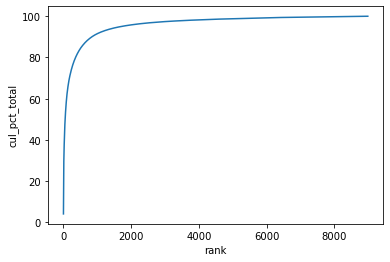

In [93]:
# Word Count Visualizations no Spacy pt. 1

# Cumulative Distribution Plot
freq_top360 = round(wc[wc['rank'] <= 360]['cul_pct_total'].max())
print(f'360 words (out of 9,000 total): Represents {freq_top360}% of all Words written in Amazon Electronics Reviews')
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

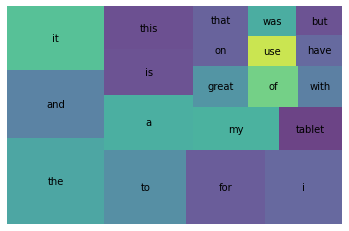

In [94]:
# Word Count Visualizations no Spacy pt. 2

# Squarify Plot
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

360 words (out of 7,000 total): Represents 75% of all Words written in Amazon Electronics Reviews


<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

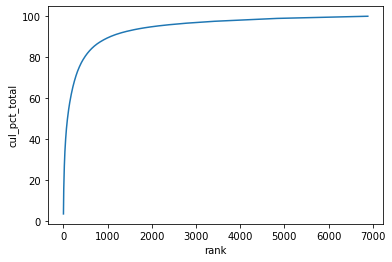

In [97]:
# Word Count Visualizations with Spacy pt. 1

# Cumulative Distribution Plot
freq_top360_spacy = round(wc_spacy[wc_spacy['rank'] <= 360]['cul_pct_total'].max())
print(f'360 words (out of 7,000 total): Represents {freq_top360_spacy}% of all Words written in Amazon Electronics Reviews')
sns.lineplot(x='rank', y='cul_pct_total', data=wc_spacy)

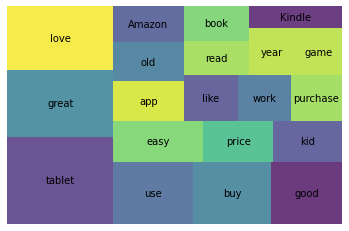

In [98]:
# Word Count Visualizations with Spacy pt. 2

# Squarify Plot
wc_top20_spacy = wc_spacy[wc_spacy['rank'] <= 20]
squarify.plot(sizes=wc_top20_spacy['pct_total'], label=wc_top20_spacy['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [103]:
# Create LDA Model with 2 Topics
lda_model2, id2word, corpus = Nlp.create_lda_model(df = reviews, num_topics = 2)


In [106]:
# View 2 Topic LDA Results
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(lda_model2, corpus, id2word)
vis2

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: t

PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
0      0.10295  0.0       1        1  53.202844
1     -0.10295  0.0       2        1  46.797156, topic_info=        Term         Freq        Total Category  logprob  loglift
1359     kid  2087.000000  2087.000000  Default  30.0000  30.0000
223      app  1866.000000  1866.000000  Default  29.0000  29.0000
1167    game  1488.000000  1488.000000  Default  28.0000  28.0000
896     gift  1029.000000  1029.000000  Default  27.0000  27.0000
33      play  1211.000000  1211.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
691   tablet  1656.705517  6264.116739   Topic2  -3.9644  -0.5707
131     year   716.504185  1683.332327   Topic2  -4.8026  -0.0948
49      work   675.100993  1569.581991   Topic2  -4.8621  -0.0844
285   Amazon   605.632148  1625.392134   Topic2  -4.9707  -0.2279
433     book   521.912518  1431.581122   Topic2  -5.1195  -0.2497

[179 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
150       1  0.023809    Alexa
150       2  0.976187    Alexa
285       1  0.627541   Amazon
285       2  0.372833   Amazon
2473      1  0.990286  Android
...     ...       ...      ...
49        2  0.430051     work
131       1  0.574456     year
131       2  0.425941     year
1371      1  0.995172    young
1371      2  0.005591    young

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [107]:
# Create LDA Model with 6 Topics
lda_model6, id2word, corpus = Nlp.create_lda_model(df = reviews, num_topics = 6)


In [108]:
# View 6 Topic LDA Results
pyLDAvis.enable_notebook()
vis6 = pyLDAvis.gensim_models.prepare(lda_model6, corpus, id2word)
vis6

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.172303 -0.144042       1        1  27.807183
3     -0.067873  0.181602       2        1  23.684573
0     -0.031101  0.052628       3        1  18.489194
1      0.009811 -0.037466       4        1  11.849102
4      0.013631 -0.011006       5        1  11.297796
2      0.247835 -0.041716       6        1   6.872151, topic_info=       Term         Freq        Total Category  logprob  loglift
1359    kid  1877.000000  1877.000000  Default  30.0000  30.0000
106   price  1911.000000  1911.000000  Default  29.0000  29.0000
5      love  4214.000000  4214.000000  Default  28.0000  28.0000
131    year  1493.000000  1493.000000  Default  27.0000  27.0000
77     easy  2532.000000  2532.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
182    come    70.078942   507.448812   Topic6  -5.2090   0.6979
96      new    74.141144   696.157764   Topic6  -5.1527   0.4381
49     work    80.309030  1605.340978   Topic6  -5.0728  -0.3175
334   right    60.509764   318.411355   Topic6  -5.3559   1.0172
1058   Fire    56.583200  1048.617967   Topic6  -5.4230  -0.2418

[466 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
837       6  0.973495   2012
2979      4  0.067815    4th
2979      5  0.881598    4th
5408      5  0.918885    4yr
150       3  0.004155  Alexa
...     ...       ...    ...
131       5  0.014059   year
131       6  0.000669   year
1371      1  0.995311  young
4524      5  0.942497    yrs
4580      4  0.964185    ôºå

[1027 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 2, 5, 3])

In [114]:
# Get Coherence Values
model_list, coherence_values = Nlp.compute_coherence_values(dictionary = id2word,
                                                            corpus = corpus,
                                                            texts = reviews['tokens_spacy'],
                                                            start = 2,
                                                            limit = 10,
                                                            step = 1)


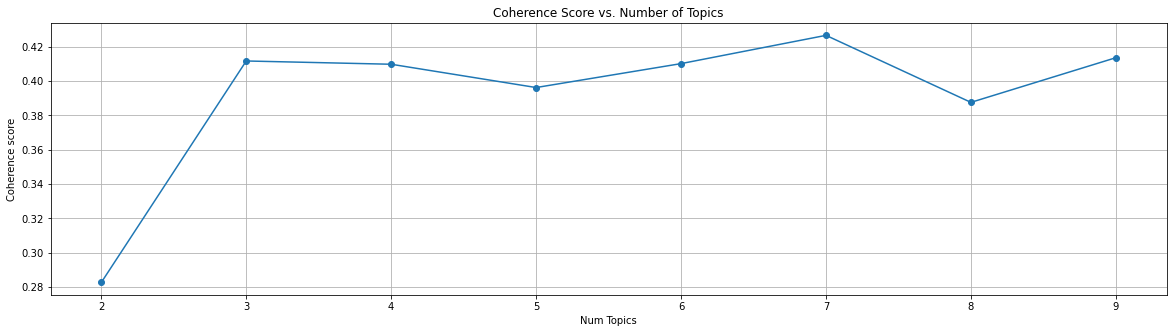

In [115]:
# Visualization of Coherence Values vs Topic Count
start=2; limit=10;  step=1;
x = range(start, limit, step)

plt.figure(figsize=(20,5))
plt.grid()
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(x)
plt.plot(x, coherence_values, "-o")

plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show();

In [123]:
# Create LDA with topic number corresponding to the highest coherence score
best = max(coherence_values)
idx = coherence_values.index(best)
lda_highest_cv = model_list[idx]

# Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_highest_cv, corpus, id2word)
vis

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.190473 -0.006478       1        1  24.578127
3     -0.025458 -0.079581       2        1  21.476347
0     -0.105472 -0.049043       3        1  16.579446
4      0.086271 -0.128639       4        1  12.711021
6     -0.013420  0.067772       5        1  12.002967
1      0.195822 -0.047234       6        1   7.117184
2      0.052730  0.243203       7        1   5.534908, topic_info=         Term         Freq        Total Category  logprob  loglift
5        love  4341.000000  4341.000000  Default  30.0000  30.0000
1359      kid  1907.000000  1907.000000  Default  29.0000  29.0000
131      year  1448.000000  1448.000000  Default  28.0000  28.0000
106     price  1920.000000  1920.000000  Default  27.0000  27.0000
878      read  1469.000000  1469.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
29       nice    63.746779   815.619191   Topic7  -5.0873   0.3451
922      able    59.359009   429.585096   Topic7  -5.1587   0.9149
109   product    64.384679  1245.100615   Topic7  -5.0774  -0.0680
1193    music    58.237983   412.943514   Topic7  -5.1777   0.9353
49       work    56.606825  1601.238195   Topic7  -5.2061  -0.4483

[527 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1282      3  0.119532    1st
1282      7  0.860630    1st
837       2  0.914211   2012
1283      7  0.945897    5th
150       4  0.138316  Alexa
...     ...       ...    ...
131       3  0.005523   year
131       4  0.010356   year
131       5  0.001381   year
131       7  0.002762   year
1371      1  0.992029  young

[1197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 5, 7, 2, 3])

In [124]:
# Create Topic Id: Name Dictionary
vis_topic_name_dict = {1:"Gifts for Kids", 
                       2:"Affordable Tablets/Electronics", 
                       3:"Easy for Customers to Use", 
                       4:"Toddler Related", 
                       5:"Battery Issues", 
                       6:"Grandparents Purchasing",  
                       7:"Audio Electronics"}

In [128]:
# Defined topics using the Ids in the vis tool, need the defined topics according to the lda model Ids
topic_id_dict = Nlp.get_topic_id_lookup_dict(vis = vis, vis_topic_name_dict = vis_topic_name_dict)
topic_id_dict

{5: 'Gifts for Kids',
 3: 'Affordable Tablets/Electronics',
 0: 'Easy for Customers to Use',
 4: 'Toddler Related',
 6: 'Battery Issues',
 1: 'Grandparents Purchasing',
 2: 'Audio Electronics'}

In [134]:
# Assign each document a topic, which will then be added as a new column in our reviews dataframe
topic_id_list = Nlp.get_topic_ids_for_docs(lda_model = lda_highest_cv, corpus = corpus)

# Creates a feature for document's topic id
reviews['topic_id'] = topic_id_list

# Iterate through the topic id and uses the lookup table to assign each document with a topic name
reviews['topic_name'] = reviews['topic_id'].apply(lambda topic_id: topic_id_dict[topic_id])

In [137]:
reviews[['tokens_spacy', 'topic_name']]

,tokens_spacy,topic_name
8343,"[great, case, place, husband, love, hold, lot]",Audio Electronics
8344,"[discard, get, rid, broken, case, broken, sele...",Grandparents Purchasing
8345,"[dollar, boycott, amazon]",Affordable Tablets/Electronics
8346,"[initial, impression, good, material, nice, sh...",Easy for Customers to Use
8347,"[pro, Standard, Echo, con, old, generation, Ec...",Grandparents Purchasing
...,...,...
28327,"[get, old, twin, old, well, perfect, way, read]",Gifts for Kids
28328,"[buy, niece, Christmas, gift.she, year, old, l...",Gifts for Kids
28329,"[nice, light, internet, browsing, keep, email,...",Easy for Customers to Use
28330,"[tablet, absolutely, want, watch, show, movie,...",Easy for Customers to Use


In [152]:
def jobs_wrangle(filename='job_listings.csv'):
    '''
    Dataframe Creations and Data Wrangling on the LinkedIn job listings dataset

    Parameters
    ----------
    filename: str: csv file name

    Returns
    -------
    jobs: object: pandas dataframe
    '''

    # Create dataframe
    jobs = pd.read_csv(filename)

    # Manipulations and/or adjustments
    jobs['clean_text'] = jobs['description'].apply(Nlp.remove_html)
    jobs['lemmas'] = jobs['clean_text'].apply(Nlp.tokenizer)
    dtm_tf = Nlp.document_term_frequency(df = jobs)
    
    return jobs, dtm_tf

In [153]:
# Create Jobs listing dataframe and clean text, get document-term frequency term-frequency
jobs, dtm_tf = jobs_wrangle()

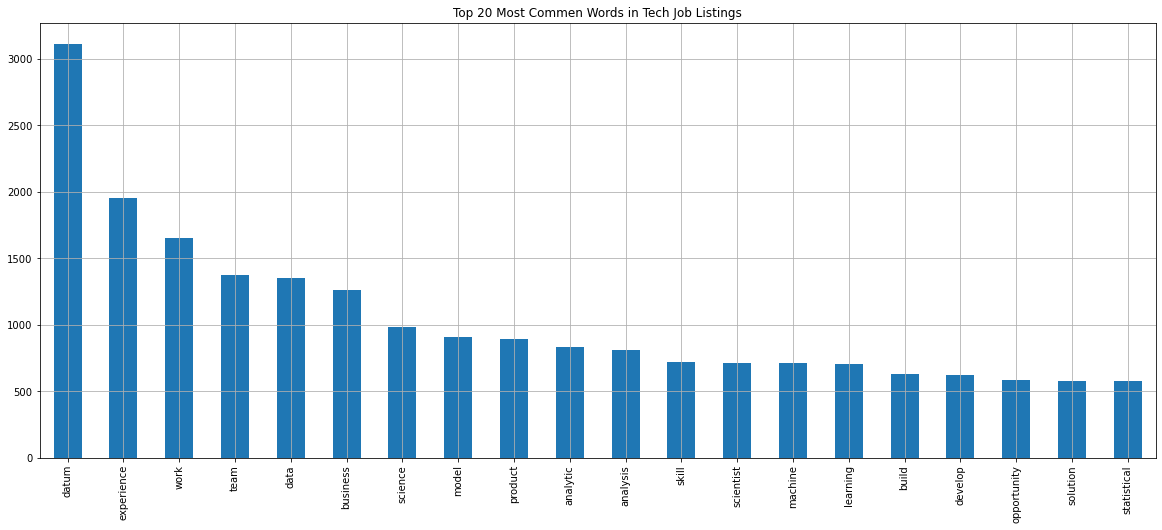

In [154]:
# Visualize Top 20 Words in Tech Job Listings on LinkedIn
top_n = 20
sorted_terms = dtm_tf.sum().sort_values(ascending=False)

plt.title("Top {} Most Commen Words in Tech Job Listings".format(top_n))
sorted_terms[:top_n].plot(kind="bar",figsize=(20,8), grid=True);

In [156]:
# Get the Term-Frequency Inverse Document Frequency
dtm_tfidf = Nlp.inverse_document_frequency(jobs)

In [157]:
# What's your ideal job
ideal_query = ["""Fully Remote.
                  Equity included in compensation.
                  Experience in Python SQL and Excel. Background in finance industry a plus.
                  Autonomy in day-to-day
                  Communication skills
                  Leadership experience"""]


In [170]:
# Find a job listing in the dataset that most closely resemble
n_dist, n_idx = Nlp.nearest_neighbor(query = ideal_query, num_neighbors = 5, df = jobs)
print('Neighbor Distance Top 5:', n_dist)
print('Neighbor Index Top 5:', n_idx)

Neighbor Distance Top 5: [[1.31474516 1.31474516 1.31577826 1.33236844 1.33291791]]
Neighbor Index Top 5: [[ 23 123 256 300  19]]


In [180]:
# View the top 5 job listings closest to our idea_query
pd.options.display.max_colwidth = 100
for idx in n_idx:
    print(jobs['clean_text'].iloc[idx])

23     motiion is a technology and data company for the food industry  we believe in transparency  dive...
123    motiion is a technology and data company for the food industry  we believe in transparency  dive...
256    role summary  the ccs data scientist is responsible for supporting the ccs digital service opera...
300    we are looking for an experienced data scientist to launch our new analytical framework for pred...
19     a yeartitle  data analyst jr  data scientist locations  charleston  sc salary         k  depende...
Name: clean_text, dtype: object
